#### Making necessary imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#### Getting data from csv into dataframe

In [2]:
data = pd.read_csv("Country-data.csv")

#### Checking the imported data

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Checking size of the data imported

In [4]:
data.shape

(167, 10)

As seen above, we have 167 rows of data with 10 columns in total

#### Checking for duplicate countries

In [5]:
data.loc[data.duplicated("country") == True]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


As we see, we do not get any row in the above output. Hence, no duplicate country names are found in the given data.

#### Checking for null values percentage in columns

In [6]:
round(pd.isnull(data).sum()/len(data),2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

As seen above, we do not have any null value in any of the given columns of the dataset

#### Creating copy of the dataframe

In [7]:
final_data = data

#### Let's check for Outliers

#### Boxplot for child_mort

{'whiskers': [<matplotlib.lines.Line2D at 0x200bf03ff60>,
 'caps': [<matplotlib.lines.Line2D at 0x200bf050860>,
 'boxes': [<matplotlib.lines.Line2D at 0x200bf03fe10>],
 'medians': [<matplotlib.lines.Line2D at 0x200bf0600f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x200bf060518>],
 'means': []}

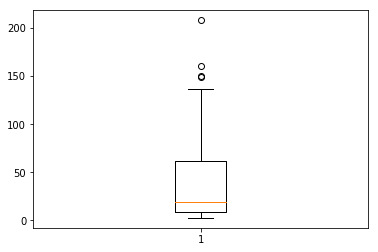

In [8]:
plt.boxplot(final_data.child_mort)

So, we see that we need to handle the outliers. Let's check for other variables as well

#### Boxplot for exports column

{'whiskers': [<matplotlib.lines.Line2D at 0x200bf0d3390>,
 'caps': [<matplotlib.lines.Line2D at 0x200bf0d3c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x200bf0d3240>],
 'medians': [<matplotlib.lines.Line2D at 0x200bf0db4e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x200bf0db908>],
 'means': []}

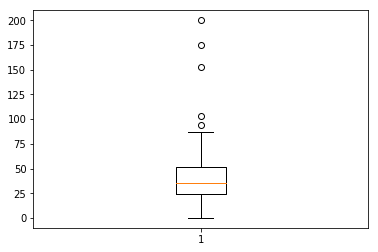

In [9]:
plt.boxplot(data.exports)

Again, we see some outliers here. Let's create a function to handle the outliers for these columns. Then, we'll check for other columns too.

#### Function for handling Outliers

In [10]:
def outlierHandler(dataframe,columnName):
    Q1 = dataframe[columnName].quantile(0.25)
    Q3 = dataframe[columnName].quantile(0.75)
    IQR = Q3 - Q1
    return dataframe[(dataframe[columnName] >=  Q1 - 1.5*IQR) & (dataframe[columnName] <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x200bf134f98>,
 'caps': [<matplotlib.lines.Line2D at 0x200bf13b898>,
 'boxes': [<matplotlib.lines.Line2D at 0x200bf134e48>],
 'medians': [<matplotlib.lines.Line2D at 0x200bf374128>],
 'fliers': [<matplotlib.lines.Line2D at 0x200bf374550>],
 'means': []}

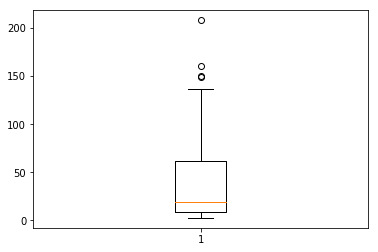

In [11]:
plt.boxplot(final_data.child_mort)

In [12]:
outlier_handled_data = outlierHandler(final_data,"child_mort")

{'whiskers': [<matplotlib.lines.Line2D at 0x200bf400fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x200bf40a8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x200bf400e80>],
 'medians': [<matplotlib.lines.Line2D at 0x200bf415160>],
 'fliers': [<matplotlib.lines.Line2D at 0x200bf415588>],
 'means': []}

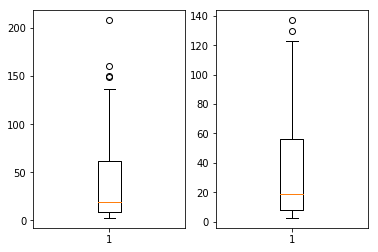

In [13]:
plt.subplot(1,2,1)
plt.boxplot(final_data.child_mort)
plt.subplot(1,2,2)
plt.boxplot(outlier_handled_data.child_mort)

{'whiskers': [<matplotlib.lines.Line2D at 0x200bf4bc828>,
 'caps': [<matplotlib.lines.Line2D at 0x200bf4c3128>,
 'boxes': [<matplotlib.lines.Line2D at 0x200bf4bc6d8>],
 'medians': [<matplotlib.lines.Line2D at 0x200bf4c3978>],
 'fliers': [<matplotlib.lines.Line2D at 0x200bf4c3da0>],
 'means': []}

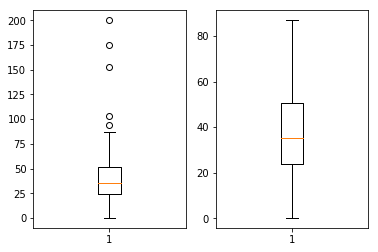

In [14]:
outlier_handled_data = outlierHandler(outlier_handled_data,"exports")

plt.subplot(1,2,1)
plt.boxplot(final_data.exports)
plt.subplot(1,2,2)
plt.boxplot(outlier_handled_data.exports)

In [15]:
outlier_handled_data = outlierHandler(outlier_handled_data,"health")

{'whiskers': [<matplotlib.lines.Line2D at 0x200bf56f0b8>,
 'caps': [<matplotlib.lines.Line2D at 0x200bf56f978>,
 'boxes': [<matplotlib.lines.Line2D at 0x200bf565f28>],
 'medians': [<matplotlib.lines.Line2D at 0x200bf577208>],
 'fliers': [<matplotlib.lines.Line2D at 0x200bf577630>],
 'means': []}

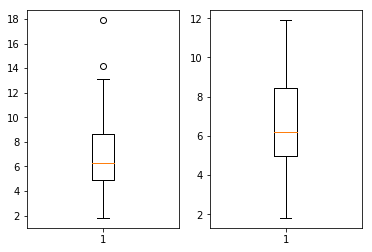

In [16]:
plt.subplot(1,2,1)
plt.boxplot(final_data.health)
plt.subplot(1,2,2)
plt.boxplot(outlier_handled_data.health)

#### Percentage of data we're currently left with

In [17]:
len(outlier_handled_data)/len(data)*100

93.41317365269461

% of data left: 92.81437125748504


{'whiskers': [<matplotlib.lines.Line2D at 0x200bf6260f0>,
 'caps': [<matplotlib.lines.Line2D at 0x200bf6269b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x200bf61bf60>],
 'medians': [<matplotlib.lines.Line2D at 0x200bf62e240>],
 'fliers': [<matplotlib.lines.Line2D at 0x200bf62e668>],
 'means': []}

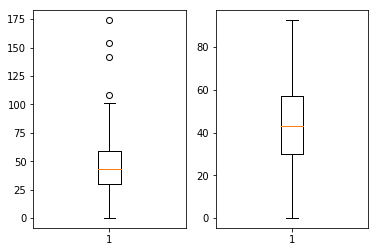

In [18]:
outlier_handled_data = outlierHandler(outlier_handled_data,"imports")
print("% of data left: "+str(len(outlier_handled_data)/len(data)*100))
plt.subplot(1,2,1)
plt.boxplot(final_data.imports)
plt.subplot(1,2,2)
plt.boxplot(outlier_handled_data.imports)



Percentage of data left: 89.22


{'whiskers': [<matplotlib.lines.Line2D at 0x200bf6d3518>,
 'caps': [<matplotlib.lines.Line2D at 0x200bf6d3dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x200bf6d33c8>],
 'medians': [<matplotlib.lines.Line2D at 0x200bf6de668>],
 'fliers': [<matplotlib.lines.Line2D at 0x200bf6dea90>],
 'means': []}

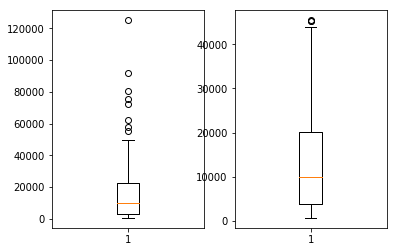

In [19]:
outlier_handled_data = outlierHandler(outlier_handled_data,"income")
print("Percentage of data left: "+str(round(len(outlier_handled_data)/len(data)*100,2)))
plt.subplot(1,2,1)
plt.boxplot(final_data.income)
plt.subplot(1,2,2)
plt.boxplot(outlier_handled_data.income)



Percentage of data left: 86.23


{'whiskers': [<matplotlib.lines.Line2D at 0x200bf7814a8>,
 'caps': [<matplotlib.lines.Line2D at 0x200bf781d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x200bf781358>],
 'medians': [<matplotlib.lines.Line2D at 0x200bf78c5f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x200bf78ca20>],
 'means': []}

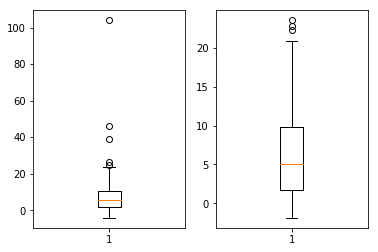

In [20]:
outlier_handled_data = outlierHandler(outlier_handled_data,"inflation")
print("Percentage of data left: "+str(round(len(outlier_handled_data)/len(data)*100,2)))
plt.subplot(1,2,1)
plt.boxplot(final_data.inflation)
plt.subplot(1,2,2)
plt.boxplot(outlier_handled_data.inflation)


Percentage of data left: 86.23


{'whiskers': [<matplotlib.lines.Line2D at 0x200bf826d68>,
 'caps': [<matplotlib.lines.Line2D at 0x200bf82e668>,
 'boxes': [<matplotlib.lines.Line2D at 0x200bf826c18>],
 'medians': [<matplotlib.lines.Line2D at 0x200bf82eeb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x200bf837320>],
 'means': []}

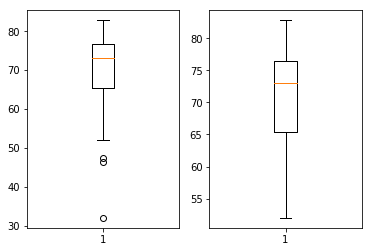

In [21]:
outlier_handled_data = outlierHandler(outlier_handled_data,"life_expec")
print("Percentage of data left: "+str(round(len(outlier_handled_data)/len(data)*100,2)))
plt.subplot(1,2,1)
plt.boxplot(final_data.life_expec)
plt.subplot(1,2,2)
plt.boxplot(outlier_handled_data.life_expec)


Percentage of data left: 85.63


{'whiskers': [<matplotlib.lines.Line2D at 0x200bf8d5cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x200bf8de5c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x200bf8d5b70>],
 'medians': [<matplotlib.lines.Line2D at 0x200bf8dee10>],
 'fliers': [<matplotlib.lines.Line2D at 0x200bf8e6278>],
 'means': []}

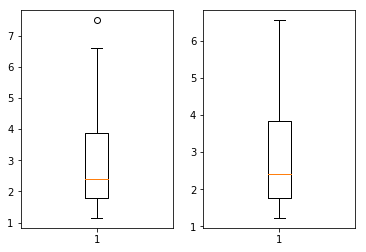

In [22]:
outlier_handled_data = outlierHandler(outlier_handled_data,"total_fer")
print("Percentage of data left: "+str(round(len(outlier_handled_data)/len(data)*100,2)))
plt.subplot(1,2,1)
plt.boxplot(final_data.total_fer)
plt.subplot(1,2,2)
plt.boxplot(outlier_handled_data.total_fer)


Percentage of data left: 74.85


{'whiskers': [<matplotlib.lines.Line2D at 0x200bf984b38>,
 'caps': [<matplotlib.lines.Line2D at 0x200bf98e438>,
 'boxes': [<matplotlib.lines.Line2D at 0x200bf9849e8>],
 'medians': [<matplotlib.lines.Line2D at 0x200bf98ec88>],
 'fliers': [<matplotlib.lines.Line2D at 0x200bf9970f0>],
 'means': []}

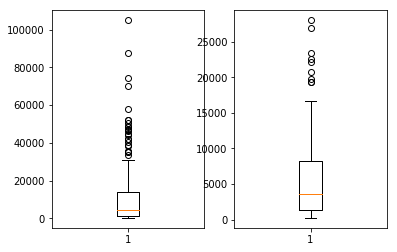

In [23]:
outlier_handled_data = outlierHandler(outlier_handled_data,"gdpp")
print("Percentage of data left: "+str(round(len(outlier_handled_data)/len(data)*100,2)))

plt.subplot(1,2,1)
plt.boxplot(final_data.gdpp)
plt.subplot(1,2,2)
plt.boxplot(outlier_handled_data.gdpp)

In [24]:
print("Percentage of data left: "+str(round(len(outlier_handled_data)/len(data)*100,2)))

Percentage of data left: 74.85


In [25]:
len(data)

167

In [26]:
len(outlier_handled_data)

125

In [27]:
heatmapData = outlier_handled_data.drop(['country'],axis = 1)
heatmapData.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


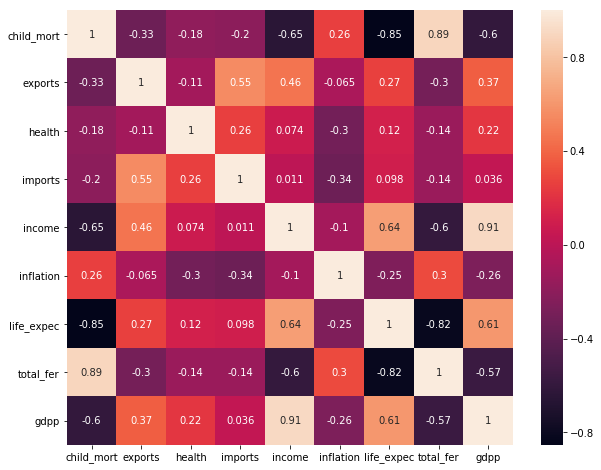

In [28]:
plt.figure(figsize  = (10,8))
sns.heatmap(heatmapData.corr(),annot = True)

In [29]:
outlier_handled_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Scaling the data

In [30]:
scaled_data = outlier_handled_data.drop(['country'], axis = 1)

#### Inspecting the dataframe

In [31]:
scaled_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Scaling

In [32]:
standard_scaler = StandardScaler()
scaled_data = standard_scaler.fit_transform(scaled_data)

In [33]:
scaled_data = pd.DataFrame(scaled_data)

In [34]:
scaled_data.head()

,0,1,2,3,4,5,6,7,8
0,1.496140,-1.453476,0.573983,-0.020965,-0.972968,0.319527,-1.823541,1.895626,-0.865741
1,-0.681544,-0.500029,0.107676,0.187261,-0.077438,-0.489241,0.948678,-0.954703,-0.286957
2,-0.364952,0.050851,-0.969809,-0.780709,0.242240,1.407687,0.976263,-0.107123,-0.226411
3,2.348278,1.316816,-1.567406,-0.133519,-0.511211,2.437028,-1.285648,2.128027,-0.378593
4,-0.867949,0.426933,-0.127741,0.766918,0.909582,-0.987572,1.017639,-0.626608,1.040140


#### Renaming columns


In [35]:
scaled_data.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

In [36]:
scaled_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.496140,-1.453476,0.573983,-0.020965,-0.972968,0.319527,-1.823541,1.895626,-0.865741
1,-0.681544,-0.500029,0.107676,0.187261,-0.077438,-0.489241,0.948678,-0.954703,-0.286957
2,-0.364952,0.050851,-0.969809,-0.780709,0.242240,1.407687,0.976263,-0.107123,-0.226411
3,2.348278,1.316816,-1.567406,-0.133519,-0.511211,2.437028,-1.285648,2.128027,-0.378593
4,-0.867949,0.426933,-0.127741,0.766918,0.909582,-0.987572,1.017639,-0.626608,1.040140


In [37]:
#### Let's check how well our data can be clustered using Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [38]:
hopkins(scaled_data)

0.7381428516666341

As we know that data for which value for Hopkin Statistics lie b/w 0.7 and 0.99 is said to have good clustering tendency. Thus, its a good sign that our data can be clustered.

In [39]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(scaled_data)
    sse_.append([k, silhouette_score(scaled_data, kmeans.labels_)])

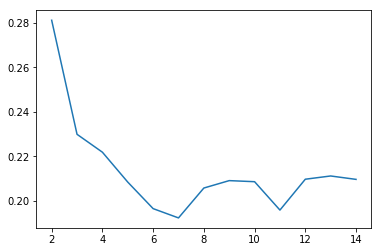

In [40]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

#### Sum of squared distances (Elbow Curve)

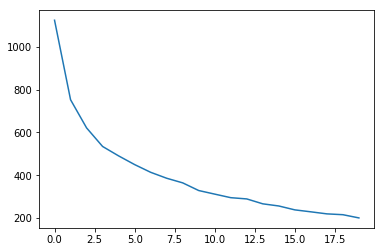

In [41]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(scaled_data)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

#### K-means with K = 3

In [42]:
# Kmeans with K=3
model_clustering = KMeans(n_clusters = 3, max_iter=50)
model_clustering.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [43]:
#Final Dataset for clustering
data_for_clustering = outlier_handled_data

In [44]:
data_for_clustering.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Checking the cluster number assigned

In [45]:
model_clustering.labels_

array([1, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1,
       1, 2, 1, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 0, 2, 1,
       1, 2, 1, 0, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0, 2, 1, 1, 1, 2, 0, 1, 0,
       2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2, 1, 0, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1])

In [46]:
# analysis of clusters formed
data_for_clustering.index = pd.RangeIndex(len(data_for_clustering.index))
data_for_clustering_km = pd.concat([data_for_clustering, pd.Series(model_clustering.labels_)], axis=1)
data_for_clustering_km.columns = ['Country','child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']

In [47]:
# km_country_name = pd.DataFrame(data_for_clustering_km.groupby(["ClusterID"]).country.count())
km_clusters_child_mort = pd.DataFrame(data_for_clustering_km.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(data_for_clustering_km.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(data_for_clustering_km.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(data_for_clustering_km.groupby(['ClusterID']).imports.mean())
km_clusters_income = pd.DataFrame(data_for_clustering_km.groupby(['ClusterID']).income.mean())
km_clusters_inflation = pd.DataFrame(data_for_clustering_km.groupby(['ClusterID']).inflation.mean())
km_clusters_life_expec = pd.DataFrame(data_for_clustering_km.groupby(['ClusterID']).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(data_for_clustering_km.groupby(['ClusterID']).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(data_for_clustering_km.groupby(['ClusterID']).gdpp.mean())

In [48]:
df = pd.concat([pd.Series([0,1,2]), km_clusters_child_mort, km_clusters_exports, km_clusters_health, km_clusters_imports, km_clusters_income, km_clusters_inflation, km_clusters_life_expec, km_clusters_total_fer, km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "Child_mort_mean", "Exports_mean", "Health_mean",'Imports_mean','Income_mean','Inflation_mean','life_expec_mean','total_fer_mean','gdpp_mean']
df

,ClusterID,Child_mort_mean,Exports_mean,Health_mean,Imports_mean,Income_mean,Inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,9.062963,54.755556,7.044444,54.374074,23755.555556,3.416630,76.503704,1.814815,14945.555556
1,1,85.159459,27.881595,6.001892,40.012592,3069.756757,9.548514,60.416216,4.917568,1446.972973
2,2,25.552459,35.573443,6.176230,44.434426,9445.901639,8.032803,71.749180,2.457213,4481.704918


#### Checking the countries to which cluster these have been assigned

In [49]:
data_for_clustering_km

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,2
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,2
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,2
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,2
7,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,2
8,Bahamas,13.8,35.00,7.89,43.7,22900,-0.393,73.8,1.86,28000,0
9,Bahrain,8.6,69.50,4.97,50.9,41100,7.440,76.0,2.16,20700,0


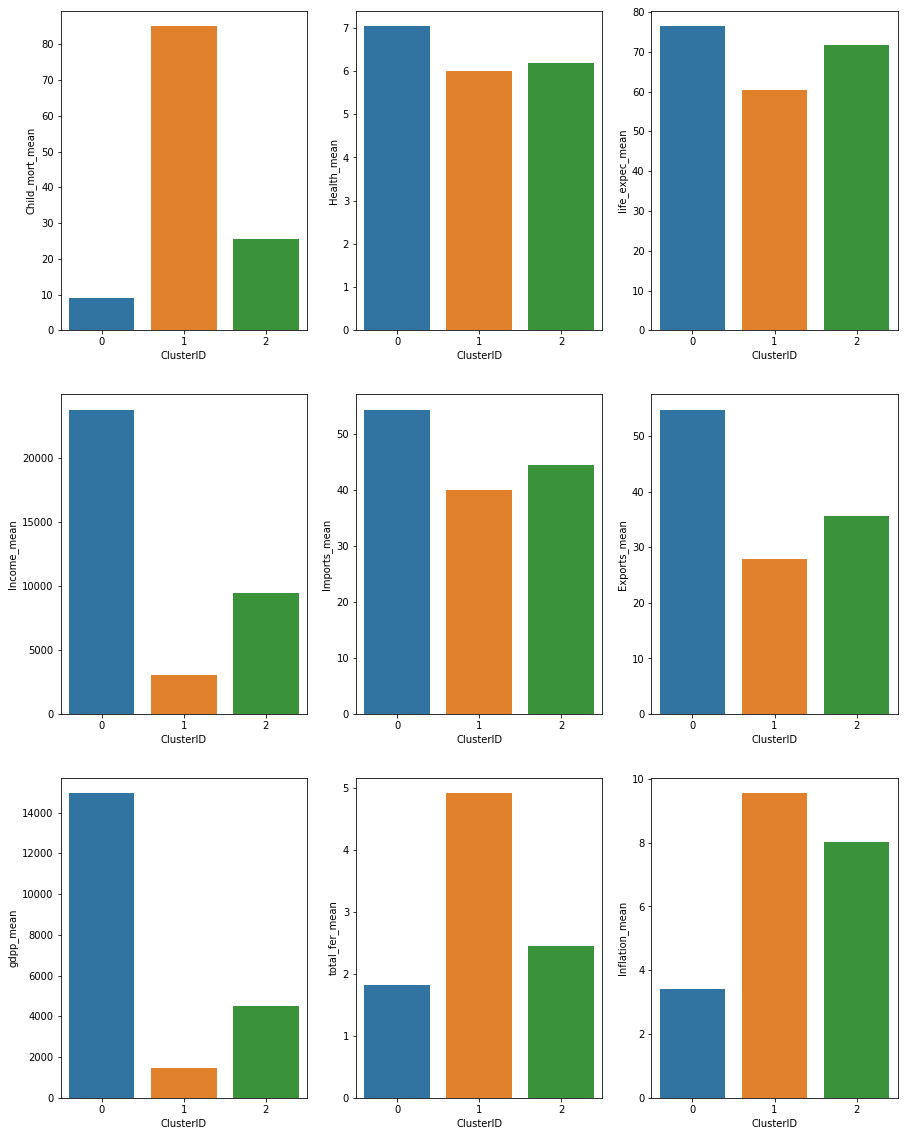

In [50]:
#  ["ClusterID", "Child_mort_mean", "Exports_mean", "Health_mean",'Imports_mean','Income_mean','Inflation_mean','life_expec_mean','total_fer_mean','gdpp_mean']

plt.figure(figsize = (15,20))
plt.subplot(3,3,1)
sns.barplot(x=df.ClusterID, y=df.Child_mort_mean)

plt.subplot(3,3,2)
sns.barplot(x=df.ClusterID, y=df.Health_mean)

plt.subplot(3,3,3)
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)

plt.subplot(3,3,4)
sns.barplot(x=df.ClusterID, y=df.Income_mean)

plt.subplot(3,3,5)
sns.barplot(x=df.ClusterID, y=df.Imports_mean)

plt.subplot(3,3,6)
sns.barplot(x=df.ClusterID, y=df.Exports_mean)

plt.subplot(3,3,7)
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)

plt.subplot(3,3,8)
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)

plt.subplot(3,3,9)
sns.barplot(x=df.ClusterID, y=df.Inflation_mean)

In [51]:
df.columns = ["ClusterID", "Child_mort_mean", "Exports_mean", "Health_mean",'Imports_mean','Income_mean','Inflation_mean','life_expec_mean','total_fer_mean','gdpp_mean']

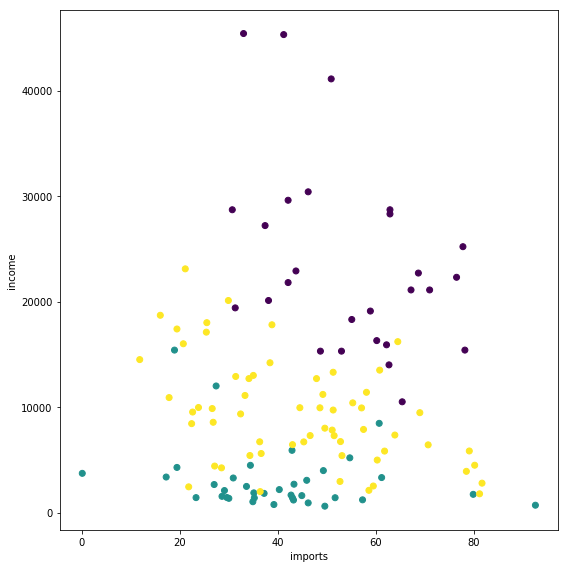

In [52]:
%matplotlib inline
fig = plt.figure(figsize = (8,8)),
plt.scatter(data_for_clustering_km.imports, data_for_clustering_km.income,c=data_for_clustering_km.ClusterID)
plt.xlabel('imports')
plt.ylabel('income')
plt.tight_layout()

# plt.colorbar(scatter)
plt.show()

#### List of countries in cluster 0

In [53]:
data_for_clustering_km.loc[data_for_clustering_km.ClusterID==0].Country

4      Antigua and Barbuda
8                  Bahamas
9                  Bahrain
11                Barbados
20                Bulgaria
26                   Chile
34                 Croatia
35          Czech Republic
41                 Estonia
47                  Greece
53                 Hungary
65                  Latvia
66                 Lebanon
68                   Libya
69               Lithuania
73                Malaysia
74                Maldives
77               Mauritius
79              Montenegro
85                    Oman
87                  Panama
91                  Poland
92                Portugal
97            Saudi Arabia
100        Slovak Republic
101               Slovenia
104            South Korea
Name: Country, dtype: object

#### Kmeans with K=4

In [107]:
model_clustering = KMeans(n_clusters = 4, max_iter=50)
model_clustering.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [108]:
#Final Dataset for clustering
data_for_clustering = outlier_handled_data

In [109]:
data_for_clustering.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Checking the cluster number assigned

In [110]:
model_clustering.labels_

array([2, 1, 3, 2, 0, 3, 3, 3, 0, 0, 3, 0, 1, 1, 2, 1, 3, 1, 1, 3, 1, 2,
       2, 1, 2, 1, 0, 3, 3, 2, 2, 2, 1, 2, 0, 0, 3, 3, 3, 1, 2, 0, 1, 3,
       2, 1, 2, 0, 1, 3, 2, 2, 1, 0, 3, 3, 3, 3, 3, 1, 3, 2, 1, 1, 2, 0,
       1, 2, 0, 0, 1, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 3, 1, 3, 0, 2, 1,
       1, 3, 3, 0, 0, 3, 3, 2, 1, 0, 2, 1, 0, 0, 1, 3, 0, 3, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 3, 1, 2, 1, 3, 3, 1, 1, 2, 2])

In [111]:
# analysis of clusters formed
data_for_clustering.index = pd.RangeIndex(len(data_for_clustering.index))
data_for_clustering_km = pd.concat([data_for_clustering, pd.Series(model_clustering.labels_)], axis=1)
data_for_clustering_km.columns = ['Country','child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']

In [112]:
# km_country_name = pd.DataFrame(data_for_clustering_km.groupby(["ClusterID"]).country.count())
km_clusters_child_mort = pd.DataFrame(data_for_clustering_km.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(data_for_clustering_km.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(data_for_clustering_km.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(data_for_clustering_km.groupby(['ClusterID']).imports.mean())
km_clusters_income = pd.DataFrame(data_for_clustering_km.groupby(['ClusterID']).income.mean())
km_clusters_inflation = pd.DataFrame(data_for_clustering_km.groupby(['ClusterID']).inflation.mean())
km_clusters_life_expec = pd.DataFrame(data_for_clustering_km.groupby(['ClusterID']).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(data_for_clustering_km.groupby(['ClusterID']).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(data_for_clustering_km.groupby(['ClusterID']).gdpp.mean())

In [113]:
df = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort, km_clusters_exports, km_clusters_health, km_clusters_imports, km_clusters_income, km_clusters_inflation, km_clusters_life_expec, km_clusters_total_fer, km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "Child_mort_mean", "Exports_mean", "Health_mean",'Imports_mean','Income_mean','Inflation_mean','life_expec_mean','total_fer_mean','gdpp_mean']
df

,ClusterID,Child_mort_mean,Exports_mean,Health_mean,Imports_mean,Income_mean,Inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,8.042857,55.076190,6.988571,51.733333,26380.952381,3.938143,76.495238,1.791905,17046.190476
1,1,23.545000,44.490000,6.892750,59.462500,9004.750000,4.755225,71.345000,2.428750,4451.900000
2,2,87.963636,27.242727,5.926061,40.972727,2253.969697,10.021970,60.657576,5.119394,926.606061
3,3,30.348387,27.251258,5.515806,27.163416,11051.935484,10.706774,71.477419,2.487742,5284.774194


#### Checking the countries to which cluster these have been assigned

In [114]:
data_for_clustering_km

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,3
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,3
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,3
7,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,3
8,Bahamas,13.8,35.00,7.89,43.7,22900,-0.393,73.8,1.86,28000,0
9,Bahrain,8.6,69.50,4.97,50.9,41100,7.440,76.0,2.16,20700,0


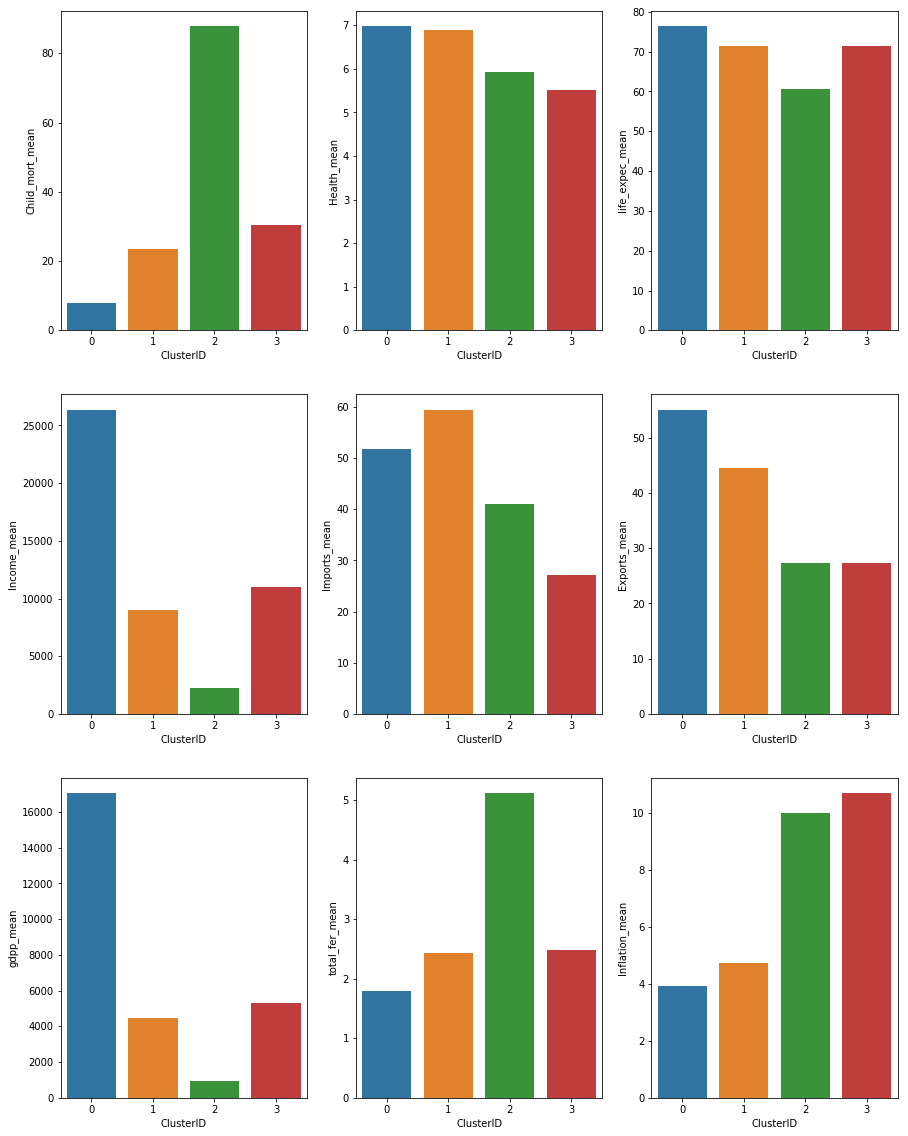

In [115]:
#  ["ClusterID", "Child_mort_mean", "Exports_mean", "Health_mean",'Imports_mean','Income_mean','Inflation_mean','life_expec_mean','total_fer_mean','gdpp_mean']

plt.figure(figsize = (15,20))
plt.subplot(3,3,1)
sns.barplot(x=df.ClusterID, y=df.Child_mort_mean)

plt.subplot(3,3,2)
sns.barplot(x=df.ClusterID, y=df.Health_mean)

plt.subplot(3,3,3)
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)

plt.subplot(3,3,4)
sns.barplot(x=df.ClusterID, y=df.Income_mean)

plt.subplot(3,3,5)
sns.barplot(x=df.ClusterID, y=df.Imports_mean)

plt.subplot(3,3,6)
sns.barplot(x=df.ClusterID, y=df.Exports_mean)

plt.subplot(3,3,7)
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)

plt.subplot(3,3,8)
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)

plt.subplot(3,3,9)
sns.barplot(x=df.ClusterID, y=df.Inflation_mean)

#### Hierarchical Clustering

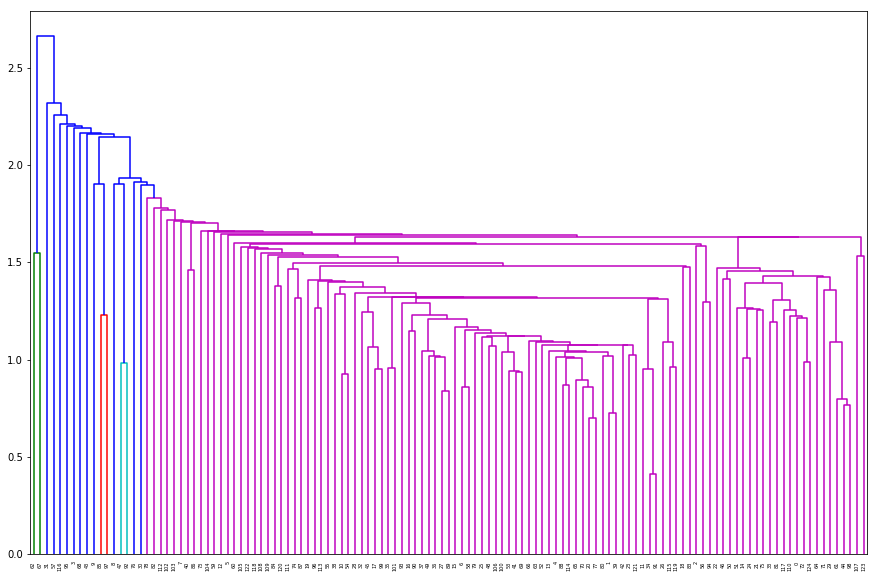

In [63]:
plt.figure(figsize = (15,10))
mergings = linkage(scaled_data, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [64]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
clustering_hc = pd.concat([data_for_clustering, clusterCut], axis=1)
clustering_hc.columns = ['Country','child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']


In [65]:
#summarise

km_clusters_child_mort = pd.DataFrame(clustering_hc.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(clustering_hc.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(clustering_hc.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(clustering_hc.groupby(['ClusterID']).imports.mean())
km_clusters_income = pd.DataFrame(clustering_hc.groupby(['ClusterID']).income.mean())
km_clusters_inflation = pd.DataFrame(clustering_hc.groupby(['ClusterID']).inflation.mean())
km_clusters_life_expec = pd.DataFrame(clustering_hc.groupby(['ClusterID']).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(clustering_hc.groupby(['ClusterID']).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(clustering_hc.groupby(['ClusterID']).gdpp.mean())

In [66]:
df = pd.concat([pd.Series([0,1,2]), km_clusters_child_mort, km_clusters_exports, km_clusters_health, km_clusters_imports, km_clusters_income, km_clusters_inflation, km_clusters_life_expec, km_clusters_total_fer, km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "Child_mort_mean", "Exports_mean", "Health_mean",'Imports_mean','Income_mean','Inflation_mean','life_expec_mean','total_fer_mean','gdpp_mean']
df

,ClusterID,Child_mort_mean,Exports_mean,Health_mean,Imports_mean,Income_mean,Inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,38.839344,37.397533,6.257869,44.523491,10848.860656,7.441434,69.637705,3.008443,5949.959016
1,1,63.900000,85.100000,2.460000,54.700000,5190.000000,20.700000,60.400000,4.950000,2740.000000
2,2,76.000000,16.200000,11.550000,86.250000,1215.000000,3.495000,60.750000,4.430000,908.500000


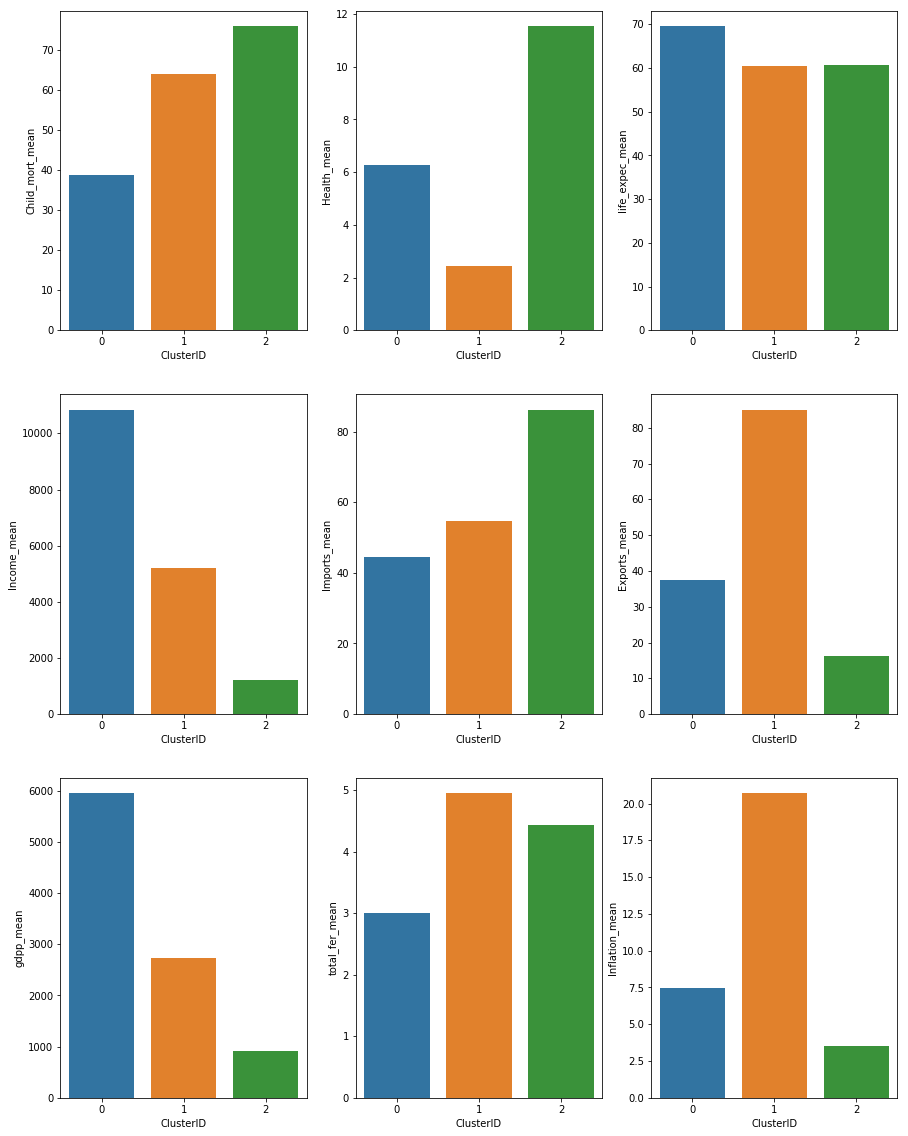

In [67]:
#  ["ClusterID", "Child_mort_mean", "Exports_mean", "Health_mean",'Imports_mean','Income_mean','Inflation_mean','life_expec_mean','total_fer_mean','gdpp_mean']

plt.figure(figsize = (15,20))
plt.subplot(3,3,1)
sns.barplot(x=df.ClusterID, y=df.Child_mort_mean)

plt.subplot(3,3,2)
sns.barplot(x=df.ClusterID, y=df.Health_mean)

plt.subplot(3,3,3)
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)

plt.subplot(3,3,4)
sns.barplot(x=df.ClusterID, y=df.Income_mean)

plt.subplot(3,3,5)
sns.barplot(x=df.ClusterID, y=df.Imports_mean)

plt.subplot(3,3,6)
sns.barplot(x=df.ClusterID, y=df.Exports_mean)

plt.subplot(3,3,7)
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)

plt.subplot(3,3,8)
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)

plt.subplot(3,3,9)
sns.barplot(x=df.ClusterID, y=df.Inflation_mean)

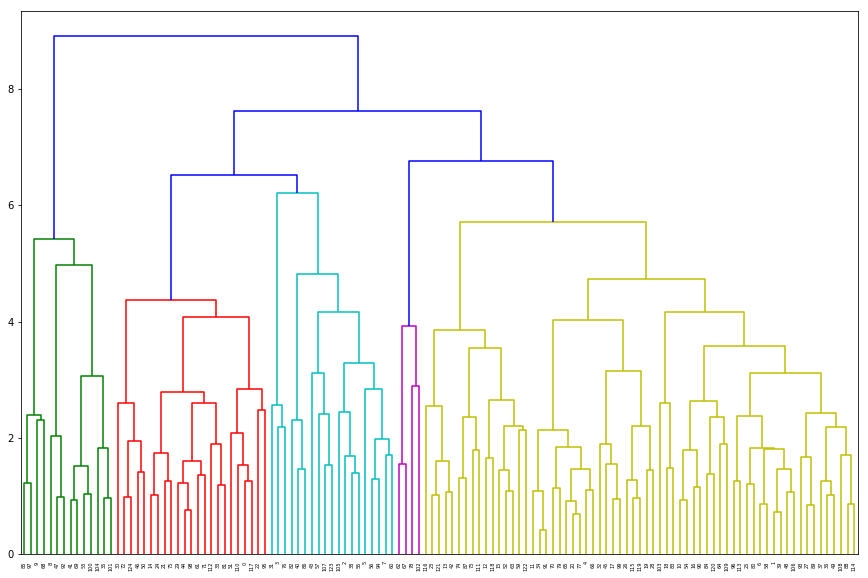

In [68]:
plt.figure(figsize = (15,10))
mergings = linkage(scaled_data, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [69]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
clustering_hc = pd.concat([data_for_clustering, clusterCut], axis=1)
clustering_hc.columns = ['Country','child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']


In [70]:
#summarise

km_clusters_child_mort = pd.DataFrame(clustering_hc.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(clustering_hc.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(clustering_hc.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(clustering_hc.groupby(['ClusterID']).imports.mean())
km_clusters_income = pd.DataFrame(clustering_hc.groupby(['ClusterID']).income.mean())
km_clusters_inflation = pd.DataFrame(clustering_hc.groupby(['ClusterID']).inflation.mean())
km_clusters_life_expec = pd.DataFrame(clustering_hc.groupby(['ClusterID']).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(clustering_hc.groupby(['ClusterID']).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(clustering_hc.groupby(['ClusterID']).gdpp.mean())

In [71]:
df = pd.concat([pd.Series([0,1,2]), km_clusters_child_mort, km_clusters_exports, km_clusters_health, km_clusters_imports, km_clusters_income, km_clusters_inflation, km_clusters_life_expec, km_clusters_total_fer, km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "Child_mort_mean", "Exports_mean", "Health_mean",'Imports_mean','Income_mean','Inflation_mean','life_expec_mean','total_fer_mean','gdpp_mean']
df

,ClusterID,Child_mort_mean,Exports_mean,Health_mean,Imports_mean,Income_mean,Inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,72.680952,28.605214,5.488571,33.784902,5582.404762,11.723690,63.159524,4.506905,2334.071429
1,1,25.988406,38.593913,6.666522,50.708696,9823.478261,5.508826,71.759420,2.408406,5246.681159
2,2,7.750000,58.257143,7.036429,52.942857,29921.428571,4.502929,76.685714,1.812143,19314.285714


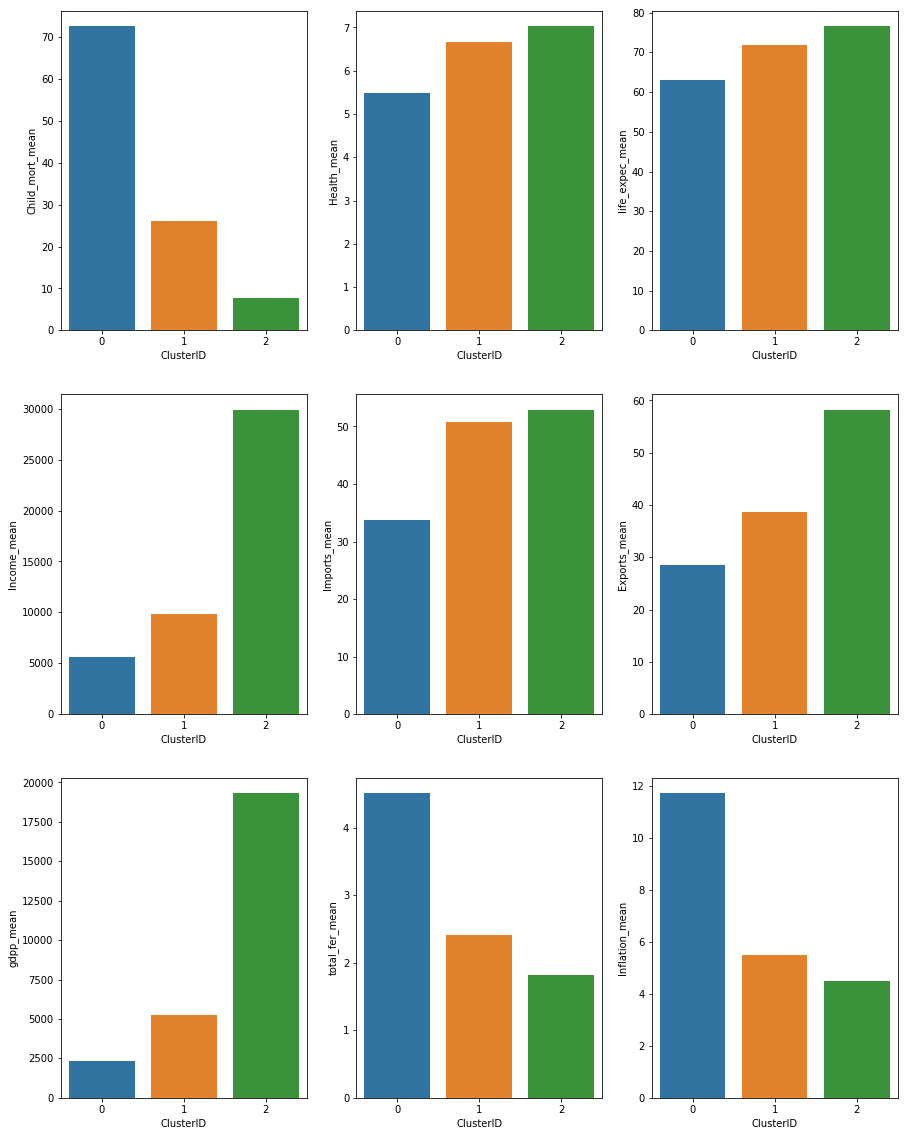

In [72]:
#  ["ClusterID", "Child_mort_mean", "Exports_mean", "Health_mean",'Imports_mean','Income_mean','Inflation_mean','life_expec_mean','total_fer_mean','gdpp_mean']

plt.figure(figsize = (15,20))
plt.subplot(3,3,1)
sns.barplot(x=df.ClusterID, y=df.Child_mort_mean)

plt.subplot(3,3,2)
sns.barplot(x=df.ClusterID, y=df.Health_mean)

plt.subplot(3,3,3)
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)

plt.subplot(3,3,4)
sns.barplot(x=df.ClusterID, y=df.Income_mean)

plt.subplot(3,3,5)
sns.barplot(x=df.ClusterID, y=df.Imports_mean)

plt.subplot(3,3,6)
sns.barplot(x=df.ClusterID, y=df.Exports_mean)

plt.subplot(3,3,7)
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)

plt.subplot(3,3,8)
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)

plt.subplot(3,3,9)
sns.barplot(x=df.ClusterID, y=df.Inflation_mean)

#### Preparing data for PCA

In [73]:
data_for_pca = data.drop(['country'], axis = 1)

#### Standardizing continous variables

In [74]:
normalized_df_for_pca = (data_for_pca-data_for_pca.mean())/data_for_pca.std()

In [75]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [76]:
#Doing the PCA on the data
pca.fit(normalized_df_for_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [77]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [78]:
colnames = list(normalized_df_for_pca.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.419519,0.192884,child_mort
1,0.283897,0.613163,exports
2,0.150838,-0.243087,health
3,0.161482,0.671821,imports
4,0.398441,0.022536,income


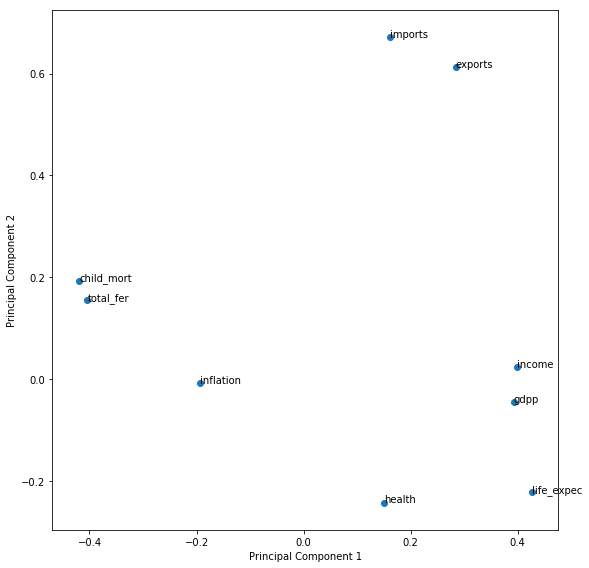

In [79]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

#### Looking at the screeplot to assess the number of needed principal components

In [80]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

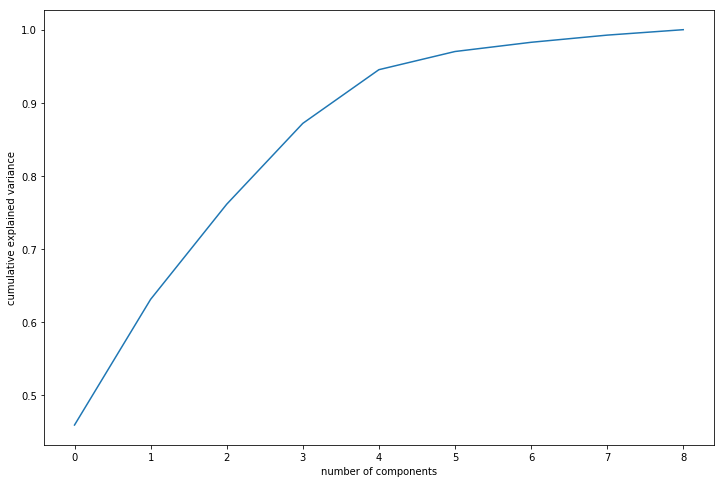

In [81]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 4 components are enough to describe 95% of the variance in the dataset
- We'll choose 4 components for our modeling

In [82]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [83]:
df_pca = pca_final.fit_transform(normalized_df_for_pca)
df_pca.shape

(167, 4)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [84]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

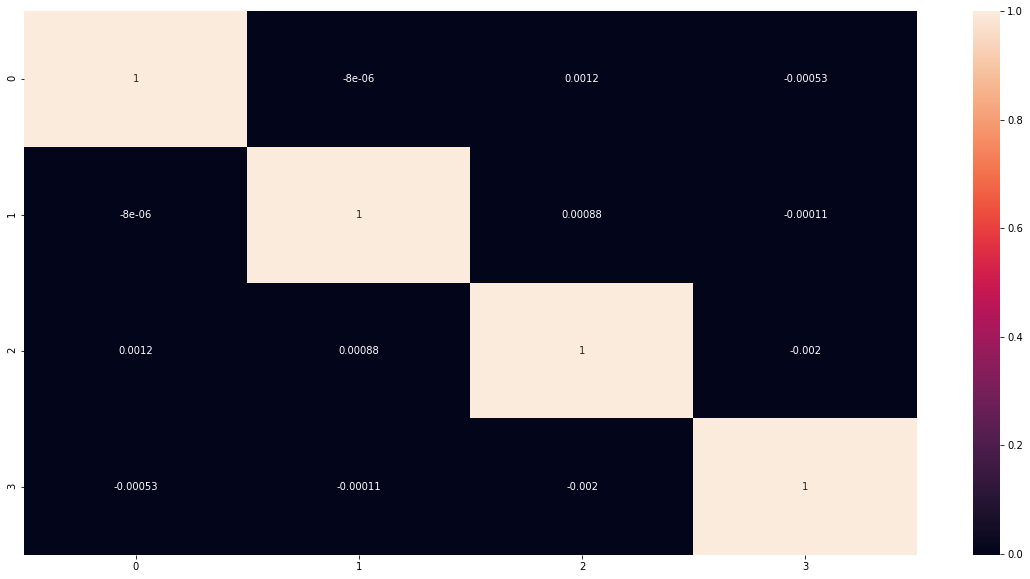

In [85]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [86]:
pd.DataFrame(df_pca).head()

,0,1,2,3
0,-2.905050,0.088089,0.718841,0.993710
1,0.428070,-0.586096,0.320090,-1.167681
2,-0.282140,-0.445318,-1.221462,-0.847578
3,-2.922180,1.694341,-1.517172,0.873340
4,1.028893,0.130097,0.192344,-0.842275


In [87]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0011961925092542815 , min corr:  -0.0020378295355501647


#### Indeed - there is no correlation between any two components! Good job, PCA!
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [88]:
#  Preparing final pca data
final_pca_data = pd.DataFrame(df_pca)
final_pca_data.columns = ['PC1','PC2','PC3','PC4']
print(len(final_pca_data))
final_pca_data.head()

167


,PC1,PC2,PC3,PC4
0,-2.905050,0.088089,0.718841,0.993710
1,0.428070,-0.586096,0.320090,-1.167681
2,-0.282140,-0.445318,-1.221462,-0.847578
3,-2.922180,1.694341,-1.517172,0.873340
4,1.028893,0.130097,0.192344,-0.842275


In [89]:
# Kmeans with K=3
model_clustering = KMeans(n_clusters = 3, max_iter=50)
model_clustering.fit(final_pca_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [90]:
# Adding country column
final_pca_data = pd.concat([final_pca_data, pd.DataFrame(data.country)], axis = 1)

In [91]:
final_pca_data.head()

,PC1,PC2,PC3,PC4,country
0,-2.905050,0.088089,0.718841,0.993710,Afghanistan
1,0.428070,-0.586096,0.320090,-1.167681,Albania
2,-0.282140,-0.445318,-1.221462,-0.847578,Algeria
3,-2.922180,1.694341,-1.517172,0.873340,Angola
4,1.028893,0.130097,0.192344,-0.842275,Antigua and Barbuda


In [92]:
# analysis of clusters formed
final_pca_data.index = pd.RangeIndex(len(final_pca_data.index))
data_for_clustering_pca = pd.concat([final_pca_data, pd.Series(model_clustering.labels_)], axis=1)
# data_for_clustering_pca.head()
data_for_clustering_pca.columns = ['PC1','PC2', 'PC3', 'PC4','Country','ClusterID']

In [93]:
# km_country_name = pd.DataFrame(data_for_clustering_km.groupby(["ClusterID"]).country.count())
km_clusters_pc1 = pd.DataFrame(data_for_clustering_pca.groupby(["ClusterID"]).PC1.mean())
km_clusters_pc2 = pd.DataFrame(data_for_clustering_pca.groupby(["ClusterID"]).PC2.mean())
km_clusters_pc3 = pd.DataFrame(data_for_clustering_pca.groupby(["ClusterID"]).PC3.mean())
km_clusters_pc4 = pd.DataFrame(data_for_clustering_pca.groupby(['ClusterID']).PC4.mean())

In [94]:
df = pd.concat([pd.Series([0,1,2]), km_clusters_pc1, km_clusters_pc2, km_clusters_pc3, km_clusters_pc4], axis=1)
df.columns = ["ClusterID", "PC1", "PC2", "PC3",'PC4']
df

,ClusterID,PC1,PC2,PC3,PC4
0,0,2.761120,-0.213998,-0.064299,0.869823
1,1,0.175019,-0.136251,-0.026925,-0.760297
2,2,-2.427700,0.407426,0.097371,0.692581


#### Checking the countries to which cluster these have been assigned

In [95]:
data_for_clustering_pca

,PC1,PC2,PC3,PC4,Country,ClusterID
0,-2.905050,0.088089,0.718841,0.993710,Afghanistan,2
1,0.428070,-0.586096,0.320090,-1.167681,Albania,1
2,-0.282140,-0.445318,-1.221462,-0.847578,Algeria,1
3,-2.922180,1.694341,-1.517172,0.873340,Angola,2
4,1.028893,0.130097,0.192344,-0.842275,Antigua and Barbuda,1
5,0.028385,-1.751453,-0.791141,-0.052329,Argentina,1
6,-0.102541,-0.565774,-0.276836,-1.453948,Armenia,1
7,2.332441,-1.992128,-0.236341,1.129095,Australia,0
8,2.964942,-0.732646,0.546776,1.188985,Austria,0
9,-0.179466,-0.392572,-0.861664,-0.425377,Azerbaijan,1


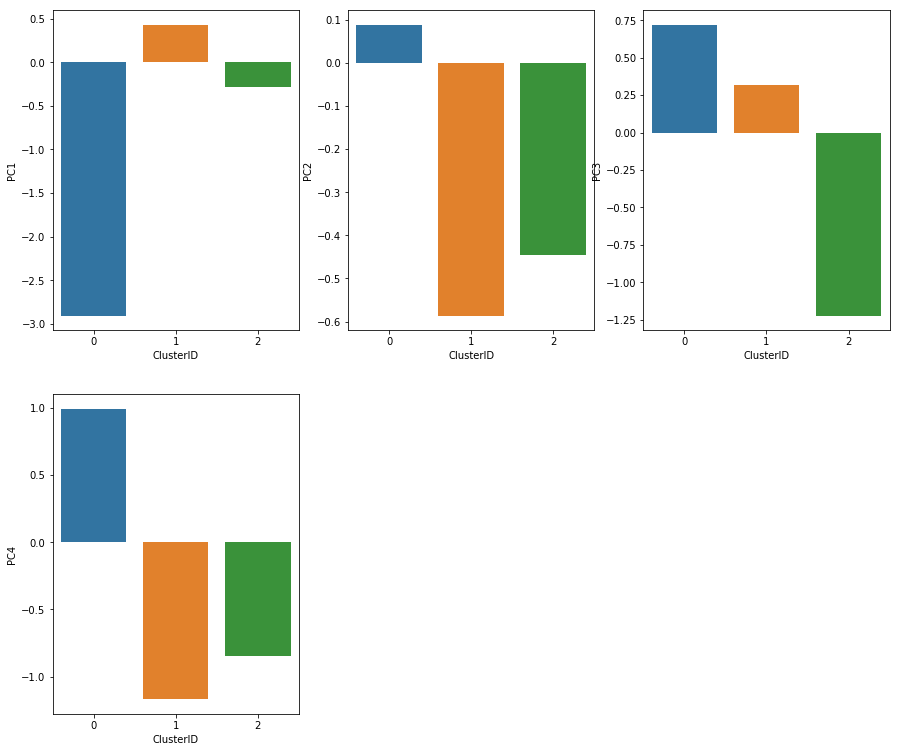

In [96]:
#  ["ClusterID", "Child_mort_mean", "Exports_mean", "Health_mean",'Imports_mean','Income_mean','Inflation_mean','life_expec_mean','total_fer_mean','gdpp_mean']

plt.figure(figsize = (15,20))
plt.subplot(3,3,1)
sns.barplot(x=df.ClusterID, y=data_for_clustering_pca.PC1)

plt.subplot(3,3,2)
sns.barplot(x=df.ClusterID, y=data_for_clustering_pca.PC2)

plt.subplot(3,3,3)
sns.barplot(x=df.ClusterID, y=data_for_clustering_pca.PC3)

plt.subplot(3,3,4)
sns.barplot(x=df.ClusterID, y=data_for_clustering_pca.PC4)


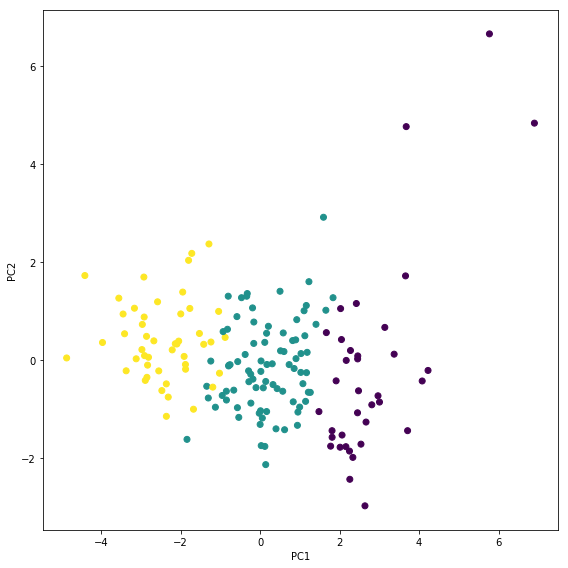

In [102]:
%matplotlib inline
fig = plt.figure(figsize = (8,8)),
plt.scatter(data_for_clustering_pca.PC1, data_for_clustering_pca.PC2,c=data_for_clustering_pca.ClusterID)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()

# plt.colorbar(scatter)
plt.show()

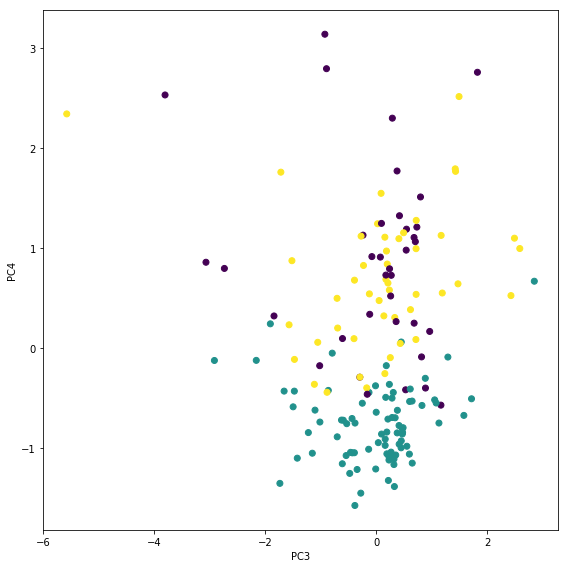

In [103]:
%matplotlib inline
fig = plt.figure(figsize = (8,8)),
plt.scatter(data_for_clustering_pca.PC3, data_for_clustering_pca.PC4,c=data_for_clustering_pca.ClusterID)
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.tight_layout()

# plt.colorbar(scatter)
plt.show()

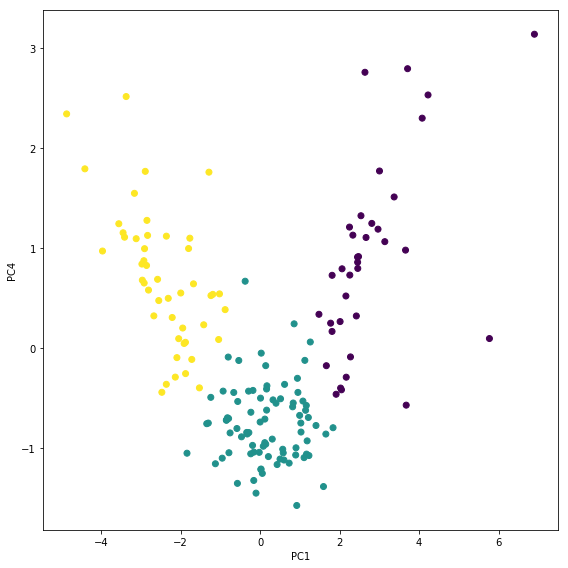

In [104]:
%matplotlib inline
fig = plt.figure(figsize = (8,8)),
plt.scatter(data_for_clustering_pca.PC1, data_for_clustering_pca.PC4,c=data_for_clustering_pca.ClusterID)
plt.xlabel('PC1')
plt.ylabel('PC4')
plt.tight_layout()

# plt.colorbar(scatter)
plt.show()